In [1]:
import numpy as np
import matplotlib.pyplot as plt

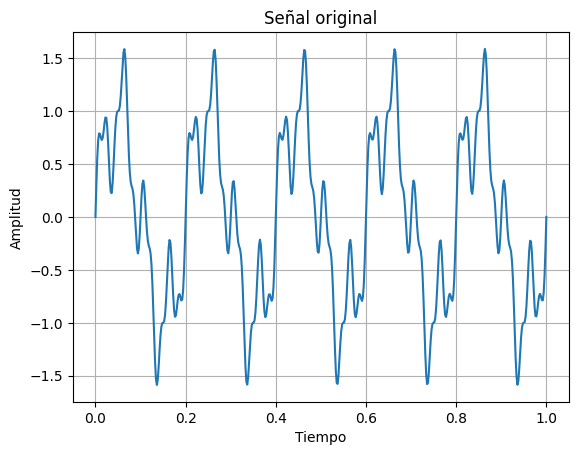

In [5]:
t = np.linspace(0, 1,500)
#Frecuecias
freq = 5
freq2 = 20
freq3 = 50


#amplitudes

amplt = 1
amplt2 = 0.5
amplt3 = 0.2


#Señales

signal = amplt * np.sin(2 * np.pi * freq * t)+ amplt2 * np.sin(2 * np.pi * freq2 * t)+ amplt3 * np.sin(2 * np.pi * freq3 * t)

plt.plot(figsize=(10,4))
plt.plot(t, signal)
plt.title('Señal original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()




In [7]:
# cuantizacion de la señal

levels_quant = 10

quant_signal = np.round(signal + 1)* (levels_quant - 1) / 2 *(2 / (levels_quant - 1)) - 1

print(quant_signal)

[ 0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.
  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  1.  1.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -2. -2. -2. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  2.  2.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -1. -1. -1. -1. -2. -2. -2. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  1.
  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0

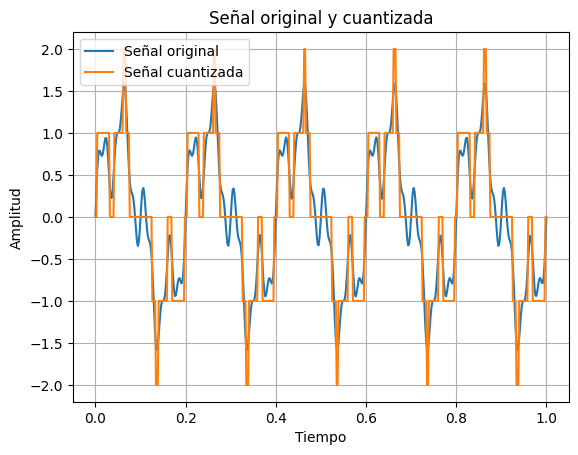

In [10]:
plt.plot(figsize=(10,4))
plt.plot(t, signal, label= 'Señal original')
plt.plot(t, quant_signal, label='Señal cuantizada')
plt.title('Señal original y cuantizada')    
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

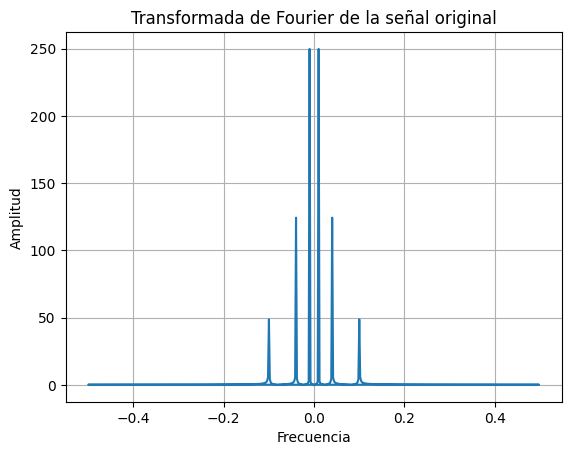

In [11]:
fft_signal = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(fft_signal))


plt.plot(figsize=(10,4))
plt.plot(freqs, np.abs(fft_signal))
plt.title('Transformada de Fourier de la señal original')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


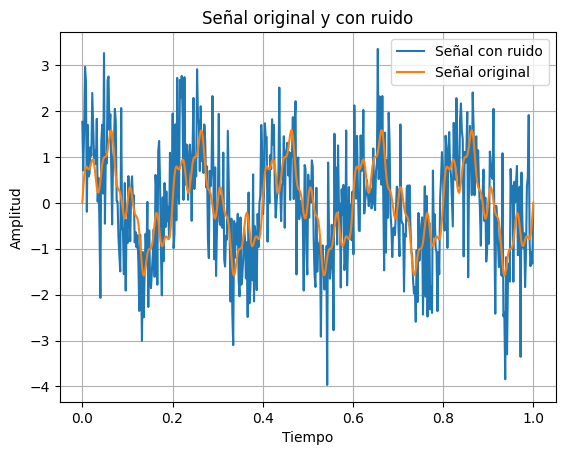

In [15]:
#Ruido
np.random.seed(0)
noise = np.random.normal(0, 1, signal.shape)

#Selañal con ruido

noise_signal = signal + noise
plt.plot(figsize=(10,4))
plt.plot(t, noise_signal, label='Señal con ruido')
plt.plot(t, signal, label='Señal original')

plt.title('Señal original y con ruido')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)  
plt.legend()
plt.show()

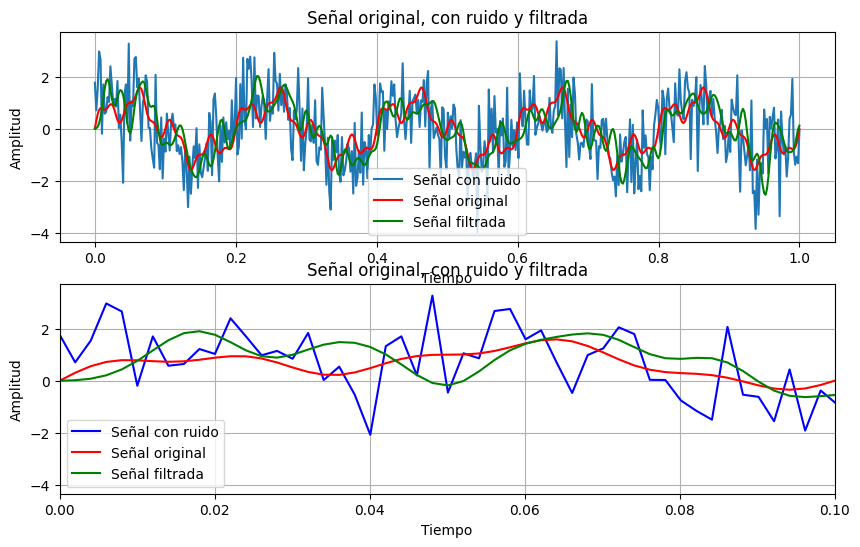

In [28]:
from scipy.signal import butter, lfilter



#funcion para filtrar la señal con un filtro pasa bajos

def butter_lowpass( data,cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y



#Filtrar la señal con un filtro pasa bajos

cutoff = 10
filtered_signal = butter_lowpass(noise_signal, cutoff , freq3*2)


fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(t, noise_signal, label='Señal con ruido')
axs[0].plot(t, signal, label='Señal original',color='r')
axs[0].plot(t, filtered_signal, label='Señal filtrada',color='g')
axs[0].set_title('Señal original, con ruido y filtrada')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)
axs[0].legend()



axs[1].plot(t, noise_signal, label='Señal con ruido', color='b')
axs[1].plot(t, signal, label='Señal original',color='r')
axs[1].plot(t, filtered_signal, label='Señal filtrada',color='g')
axs[1].set_xlim(0, 0.1)
axs[1].set_title('Señal original, con ruido y filtrada')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)
axs[1].legend()
plt.show()




In [30]:
#coefiente de correlacion

correlation_coefficient_pearson = np.corrcoef(signal, filtered_signal)[0,1]
correlation_coefficient_pearson
print(correlation_coefficient_pearson)

0.7714770586589706


-5.0


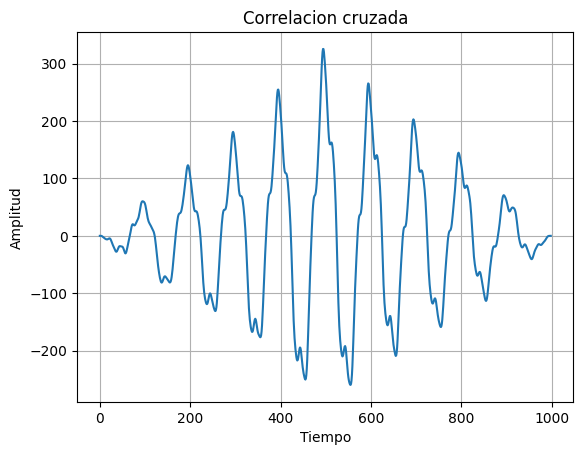

In [31]:
#correlacion cruzada

cross_correlation = np.correlate(signal, filtered_signal, mode='full')


#punto maximo de la correlacion cruzada
long_max = len(cross_correlation)
max_point = np.argmax(cross_correlation) - (long_max - 1) / 2
max_point
print(max_point)

plt.plot(figsize=(10,4))
plt.plot(cross_correlation)
plt.title('Correlacion cruzada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()
